# Classification Neural Network

In [10]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [11]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [13]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9998 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9856 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9828 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9817 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9624 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9574 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9557 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9543 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9462 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9094 - accuracy: 0.4860
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing binary classification


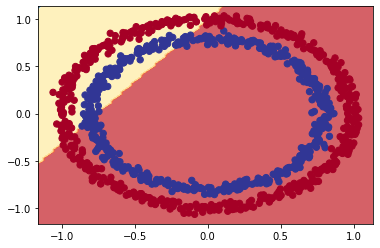

In [14]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [15]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.1363 - accuracy: 0.3440
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8898 - accuracy: 0.3390
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7208 - accuracy: 0.3350
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5376 - accuracy: 0.3370
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1619 - accuracy: 0.3380
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.8693 - accuracy: 0.3370
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.7335 - accuracy: 0.3390
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6660 - accuracy: 0.3470
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.3560
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5375 - accuracy: 0.3570
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing multi-class classification


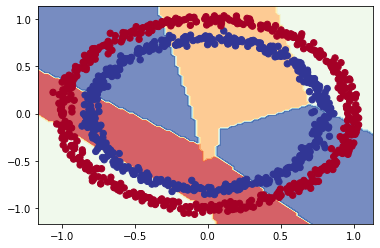

In [16]:
plot_decision_boundary(model_nl2, X, y)